# Sampling Distributions

## Random Number Generators in R

### Normal Random Numbers

**R Command**

**x=rnorm(n, mean=0, sd=1)**

Creates n random numbers from a normal distribution and stores
them in x .

$\textbf{In R, random number generators have a "r" prefix.}$

Random number generators are useful for simulating random variables and
exploring complex systems using Monte Carlo methods.


\begin{example}
Generate 3 sets of 8 random random numbers from a normally
distributed population with a mean of 10 and standard deviation of 2.
\end{example}


In [1]:
rnorm(8, mean = 10, sd = 2)

[1]  8.202468  6.505889 10.070059 10.359647  9.528402 12.876186 11.982937
[8] 11.005017

In [2]:
rnorm(8, mean = 10, sd = 2)

[1] 10.431551 13.229525  9.665662  7.587949  7.796027  8.901693  8.754601
[8]  9.966693

In [3]:
rnorm(8, mean = 10, sd = 2)

[1] 10.790867 10.795693 10.441628 11.696111 13.287052  7.708482  8.845065
[8] 11.295961

In [8]:
rnorm(8, mean = 10, sd = 2)

[1] 10.995701  6.066766 11.402712  9.054417  7.864353  9.564050  7.947991
[8]  8.542218

### set.seed(seed)
Set the seed of R‘s random number generator, which is useful for creating simulations or random objects that can be reproduced.

    seed – A number.


In [13]:
set.seed(8)

In [14]:
rnorm(8, mean = 10, sd = 2)

[1]  9.830828 11.680800  9.073034  8.898330 11.472081  9.784237  9.659422
[8]  7.823337

In [15]:
set.seed(8)

In [16]:
rnorm(8, mean = 10, sd = 2)

[1]  9.830828 11.680800  9.073034  8.898330 11.472081  9.784237  9.659422
[8]  7.823337

### Comparison of histogram of 5,000 randomly generated numbers to density function.

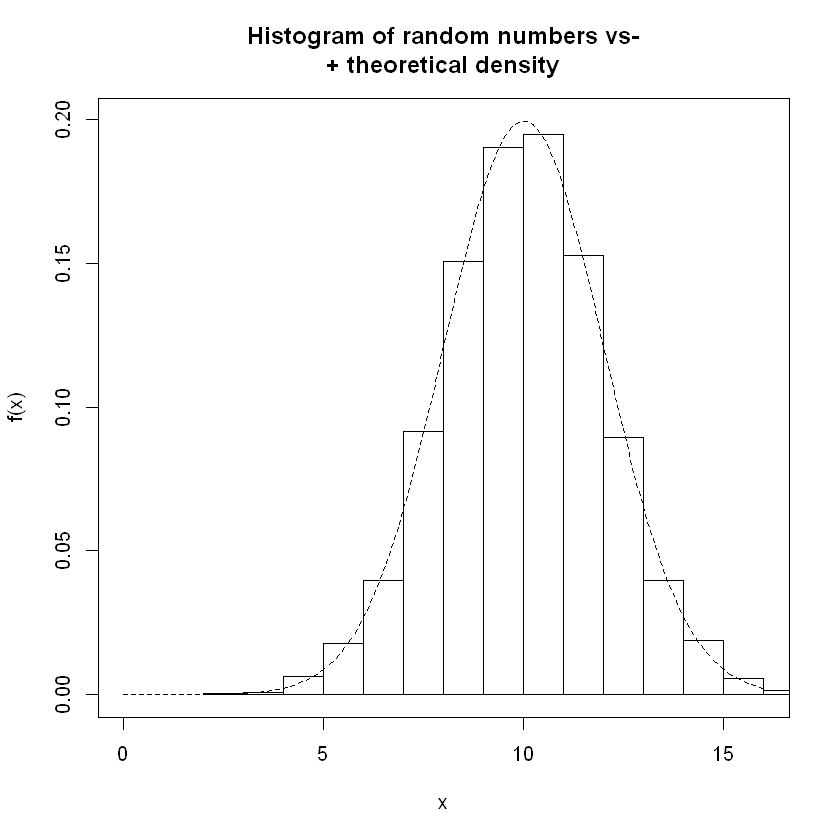

In [18]:
x.rand = rnorm ( 5000, mean = 10 , sd = 2)
curve(dnorm(x,mean = 10,sd = 2),0 ,16 ,lty = "dashed",ylab = "f(x)" , main = "Histogram of random numbers vs-
+ theoretical density")
hist(x.rand , prob = T, add = T)

\begin{proposition}
To start, the most important example is the central limit theorem (CLT). This states that if $X_i$ are
drawn independently from a population $f$ where $\mu$ and $\sigma$ are known, then the standardized average
$$\frac{X-\mu}{\sigma/\sqrt{n}}$$

is asymptotically normal with mean 0 and variance 1 (often called normal(0,1)). That is, if $n$ is large
enough the average is approximately normal with mean $\mu$ and standard deviation $\sigma/\sqrt{n}$.

\end{proposition}


\begin{example}
How can we check this? Simulation is an excellent way.
Let's first do this for the binomial distribution, the CLT translates into saying that if $S_n$ has a binomial distribution with parameters $n$ and $p$ then

$$\frac{S_n-np}{\sqrt{npq}}$$
is approximately normal(0,1)

\end{example}

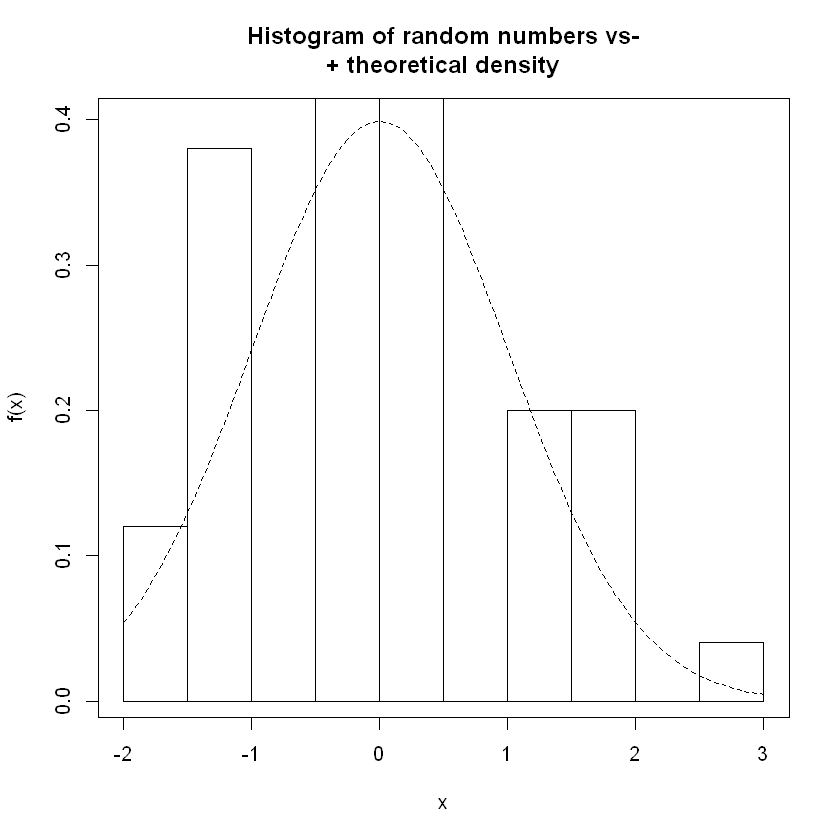

In [20]:
# Let's investigate. 
n = 10;p = .25;S = rbinom(100,n,p)
X = (S - n*p)/sqrt(n*p*(1-p)) # has 100 random numbers
curve(dnorm(x,mean = 0,sd = 1),-2 ,3 ,lty = "dashed",ylab = "f(x)" , main = "Histogram of random numbers vs-
+ theoretical density")
hist(X,prob=T,add=T)
# The results look approximately normal 

The CLT also works for normals (where the distribution is actually normal). Let's see with an
example. We will let the $X_i$ be normal with mean $\mu = 5$ and standard deviation $\sigma = 5$. Then we need
function to find the value of
$$\frac{(X_1 + X_2 + \dots + X_n) - \mu}{\sigma /\sqrt(n)}$$


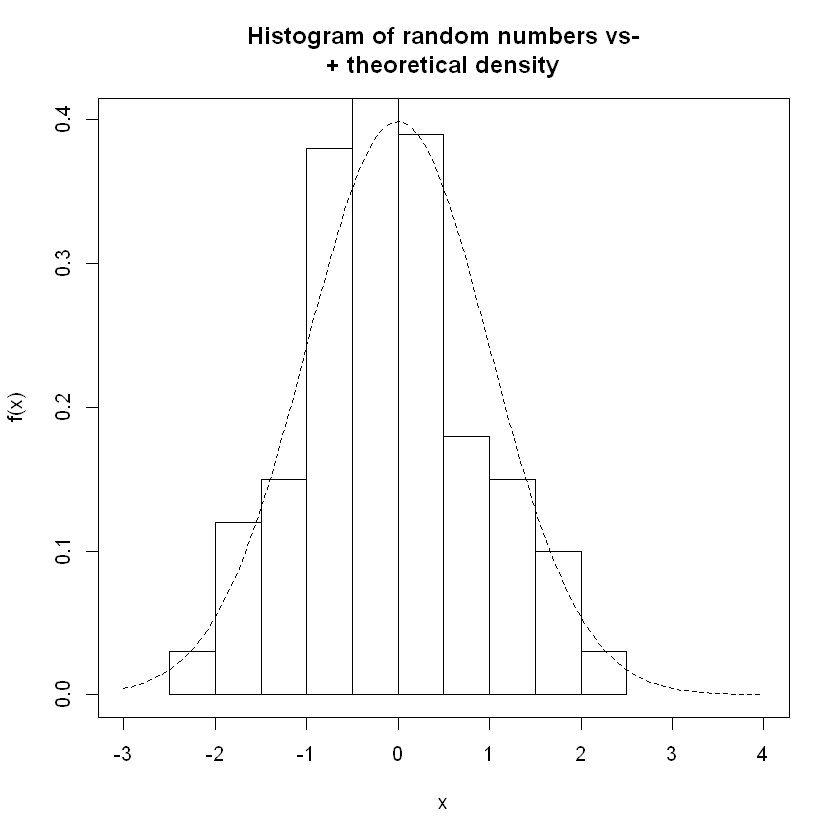

In [19]:
results = c();
mu = 0; sigma = 1
for(i in 1:200) {
  X = rnorm(100,mu,sigma)
# generate random data
 results[i] = (mean(X) - mu)/(sigma/sqrt(100))
}
curve(dnorm(x,mean = 0,sd = 1),-3 ,4 ,lty = "dashed",ylab = "f(x)" , main = "Histogram of random numbers vs-
+ theoretical density")
hist(results,prob=T,add=T)

## Normal plots
A better plot than the histogram for deciding if random data is approximately normal is the so
called "normal probability" plot. The basic idea is to graph the quantiles of your data against the
corresponding quantiles of the normal distribution. The quantiles of a data set are like the Median
and $Q_1$ and $Q_3$ only more general. The $q$ quantile is the value in the data where $q*100\%$
100% of the data
is smaller. So the 0.25 quantile is $Q_1$, the 0.5 quantile is the median and the 0.75 quantile is $Q_3$. The
quantiles for the theoretical distribution are similar, only instead of the number of data points less, it
is the area to the left that is the specified amount. For example, the median splits the area beneath
the density curve in half.
The normal probability graph is easy to read { if you know how. Essentially, if the graph looks like
a straight line then the data is approximately normal. Any curve can tell you that the distribution
has short or long tails. It is not a regression line. The line is drawn through points formed by the first
and third quantiles.
R makes all this easy to do with the functions qqnorm (more generally qqplot) and qqline which
draws a reference line (not a regression line).
This is what the graphs look like for some sample data. Notice the first two should look
like straight lines (and do), the second two shouldn't (and don't).

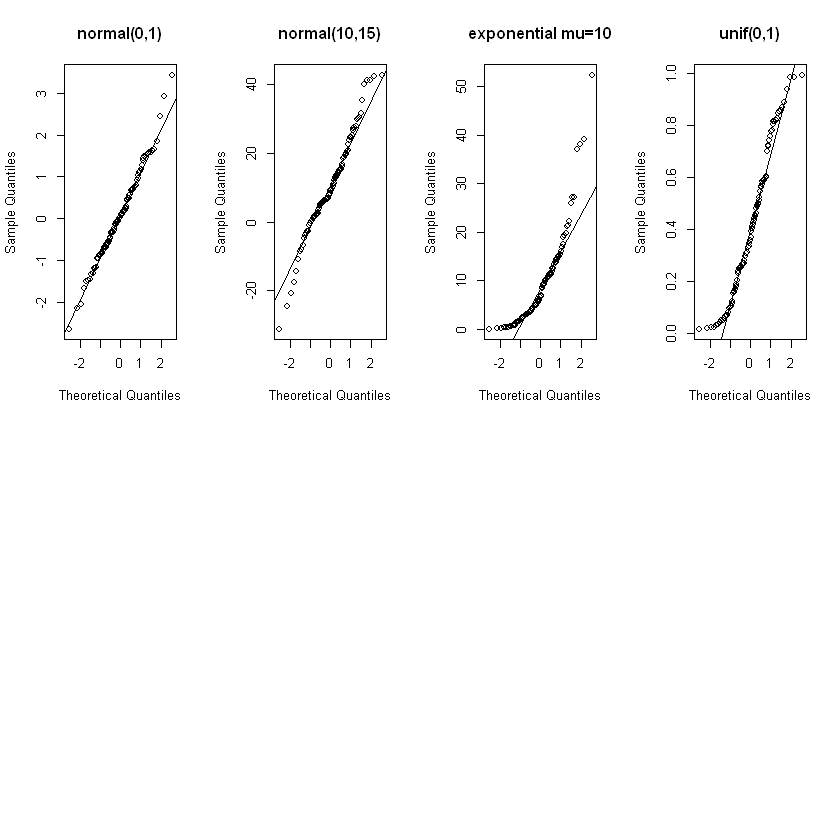

In [22]:
par(mfrow=c(2,4)) # all plots on one page 
x = rnorm(100,0,1);qqnorm(x,main='normal(0,1)');qqline(x)
x = rnorm(100,10,15);qqnorm(x,main='normal(10,15)');qqline(x)
x = rexp(100,1/10);qqnorm(x,main='exponential mu=10');qqline(x)
x = runif(100,0,1);qqnorm(x,main='unif(0,1)');qqline(x)

## Example: CLT with exponential data
Let's do one more example. Suppose we start with a skewed distribution, the central limit theorem
says that the average will eventually look normal. That is, it is approximately normal for large n. What
does "eventually" mean? What does "large" mean? We can get an idea through simulation.
A example of a skewed distribution is the exponential. We need to know if it has mean 10, then
the standard deviation is also 10, so we only need to specify the mean. Here is a function to create a
single standardized average (note that the exponential distribution has theoretical standard deviation
equal to its mean)

In [23]:
f = function(n=100,mu=10) (mean(rexp(n,1/mu))-mu)/(mu/sqrt(n))

Now we simulate for various values of n. For each of these m=100 (the number of random numbers
generated), but n varies from 1,5,15 and 50 (the number of random numbers in each of our averages).


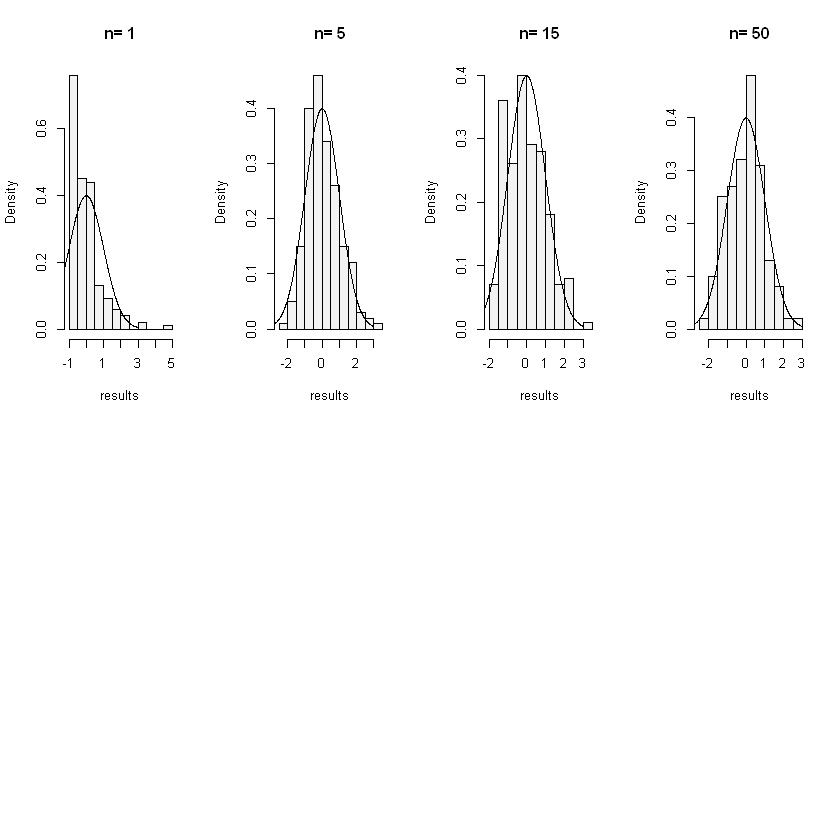

In [37]:
xvals = seq(-3,3,.01) # for the density plot
results = c();
par(mfrow=c(2,4)) # all plots on one page 
n = c(1,5,15,50)

for (k in n){
    n = 100; mu = 10
    for(i in 1:200) {

         results[i] = (mean(rexp(k,1/mu))-mu)/(mu/sqrt(k))
    }
    hist(results,probability=TRUE,main=paste("n=",k),col=gray(.95))
    points(xvals,dnorm(xvals,0,1),type="l") # plot normal curve... repeat for n=5,15,50
}

## Sampling distribution

### Definition - Sampling variability

From sample to sample the value of a statistic will vary due to random
fluctuations (sampling error).
### Definition - Sampling Distribution
A probability distribution that describes a statistic used to estimate a
parameter. Result of sampling variability. Describes how precise and
accurate a statistic is for measuring a population parameter.
### Definition - Sampling distribution of the mean.
Probability distribution of sample means $\bar{x}$ of sample size $n$.
### Definition - Sampling distribution of the proportion.
Probability distribution of sample proportions $\hat p$ of sample size $n$.


## Comparison of population dist. vs. sample mean dist.
College aged women's systolic blood pressures (in mm Hg) are normally distributed
with a mean of 114.8 and a standard deviation of 13.1.
Repeatedly sampling 20 women from the subgroup and plotting the distribution
of sample means $\bar x$ along with the population density:

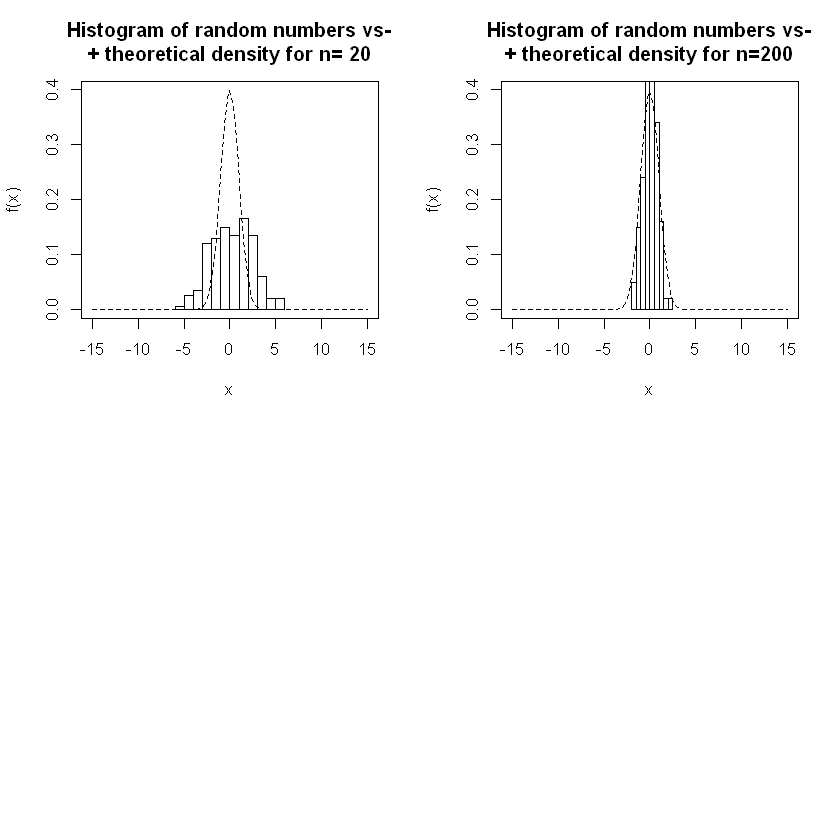

In [45]:
results = c();
par(mfrow=c(2,2)) # all plots on one page 
mu = 114.8; sigma = 13.1
for(i in 1:200) {
  X = rnorm(20,mu,sigma)
# generate random data
 results[i] = (mean(X) - mu)/(sigma/sqrt(100))
}
curve(dnorm(x,mean = 0,sd = 1),-15 ,15 ,lty = "dashed",ylab = "f(x)" , main = "Histogram of random numbers vs-
+ theoretical density for n= 20")
hist(results,prob=T,add=T)

for(i in 1:200) {
  X = rnorm(200,mu,sigma)
# generate random data
 results[i] = (mean(X) - mu)/(sigma/sqrt(100))
}
curve(dnorm(x,mean = 0,sd = 1),-15 ,15 ,lty = "dashed",ylab = "f(x)" , main = "Histogram of random numbers vs-
+ theoretical density for n=200")
hist(results,prob=T,add=T)

## Unbiased Estimators

If the mean of a sampling distribution for a statistic equals the population
parameter it is unbiased. On average, it correctly estimates the
parameter. Biased statistics tend to be wrong on average.

**unbiased statistics** mean, variance, proportion
**biased statistics** median, range, standard deviation

Good estimators are often unbiased but "biased" tends to have negative
overtones and not all biased statistics are bad. Biased statistics
are often used with great effectiveness (eg. standard deviation). Bias is
just one measure of how "good" a statistic is, there are other measures
such as consistency, efficiency, and sufficiency.


Why would we use standard deviation instead of variance if it is
biased? It is expressed in the same unit as mean.

## Why sample with replacement
* Sampling with replacement results in independent events, making the
probabilities easier to describe and the resulting formulas become much
simpler. We will assume sampling with replacement for many cases later
in this class.
* As we have seen, when our sample size is small relative to the population
($n/N \le 0.05$), sampling without replacement can be approximated as
with replacement.

## Central Limit Theorem: sampling dist. of $\bar{x}$

The sampling distribution of $\bar {x}$ with random sample size n will be
normally distributed if

    1.the population is normally distributed or
    2.the sample size n > 30.
and the mean and standard deviation of the sampling distribution
will be:
$$\mu_{\bar x} = \mu$$

standard error: $\sigma_{\bar x} = \frac{\sigma}{\sqrt(n)}$

where $\mu$ and $\sigma$ are the population mean and standard deviation.
**Very Important!**

*What the CLT tells us*

* If we satisfy the CLT, then $\bar x$ has a normal distribution and a known
mean and standard deviation.

* $\sigma_{\bar x}$ tells us how precisely we can estimate $\mu$ using $\bar x$.

* Finally, we can characterize $\bar x$'s sampling error!

* Increase n to increase the accuracy of the estimate for $\mu$. (increasing n decreases $\sigma_{\bar x}$)

Beyond sampling distributions, CLT says that variables determined by com-
plex systems often have a normal distribution (the convolution of a number of
density functions tends to be the normal). That's one reason why we see it frequently in nature: height, weight, . . .

### Question. If we repeatedly sample all the possible combinations of 10 women what would the distribution of sample means look like?

* Case I when CLT applies*

Since x is normally distributed we see the sample mean $\bar x$ distribution is also
normally distributed as predicted by the CLT.

The Empirical rule tells us:

* 95% of data x : $\mu_{x} \pm 2 \sigma_{x}= 100 \pm 2 \dot 15 = 100 \pm 30$

* 95% of sample means $\bar x$ :$ \mu_{\bar x} \pm 2\sigma_{\bar x} = 100 \pm 2\frac{15}{\sqrt 9} = 100 \pm 10$


* Case II when CLT applies.*

If x is not normally distributed (it's a gamma dist.) we see the sample mean
$\bar x$ distribution is not normally distributed when $n < 30$
, but is approximately
normally distributed when $n > 30$ as predicted by the CLT.




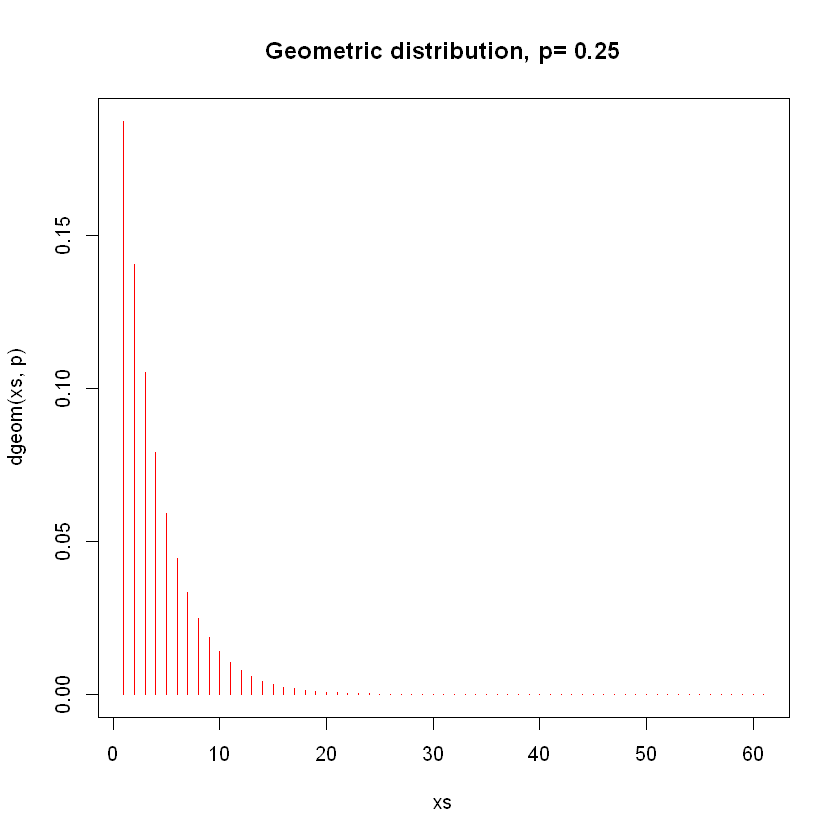

In [71]:
p <- 0.25
xs <- seq(0:60)
plot(xs,dgeom(xs,p),type="h",col="red", main=paste('Geometric distribution, p=',p))


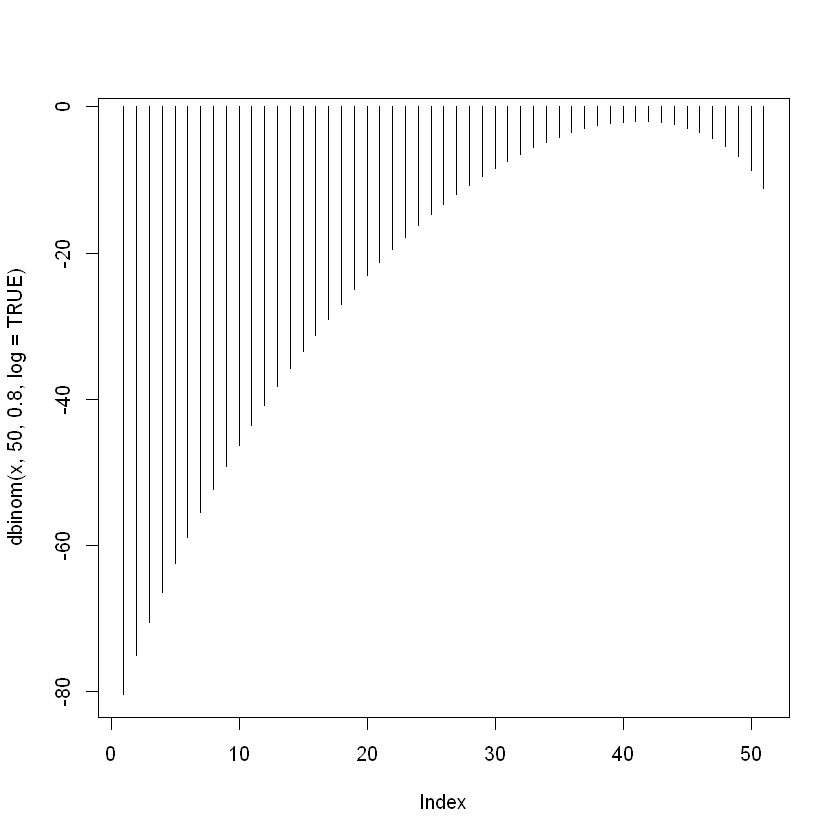

In [66]:
x <- seq(0,50,1)
plot(dbinom(x,50,0.8,log=TRUE),type="h")

In [67]:
#install.packages("fitdistrplus")

Installing package into 'C:/Users/IliasAlexis/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"unable to access index for repository http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5:
  cannot open URL 'http://www.stats.ox.ac.uk/pub/RWin/bin/windows/contrib/3.5/PACKAGES'"Warning message:
"package 'fitdistrplus' is in use and will not be installed"

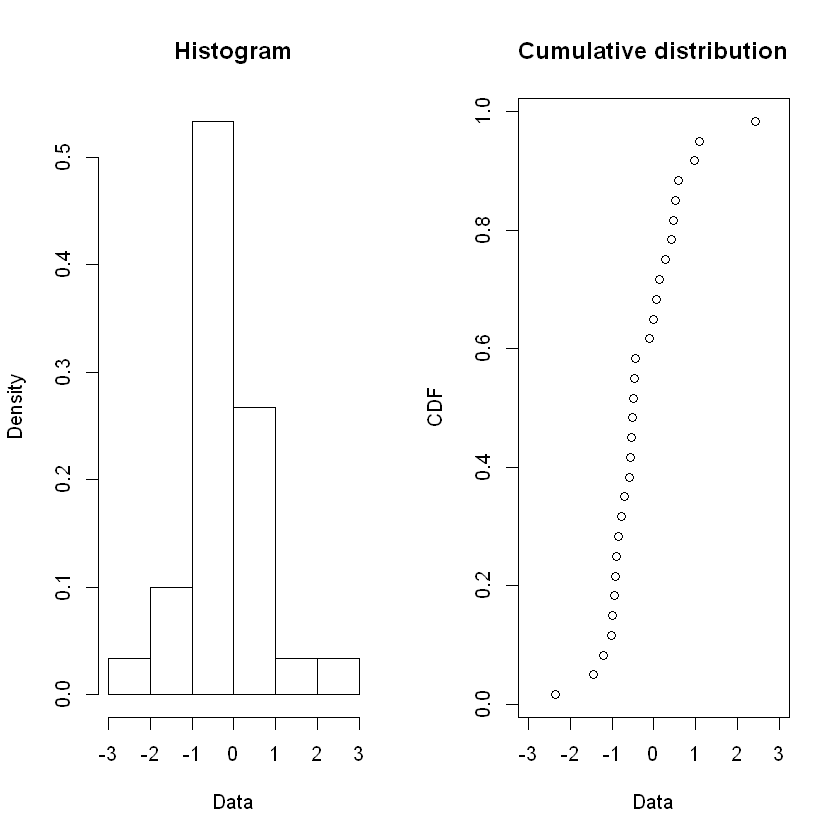

Warning message in hist.default(data, freq = FALSE, xlab = "Data", main = "Histogram", :
"arguments 'freq', 'main', 'xlab' are not made use of"

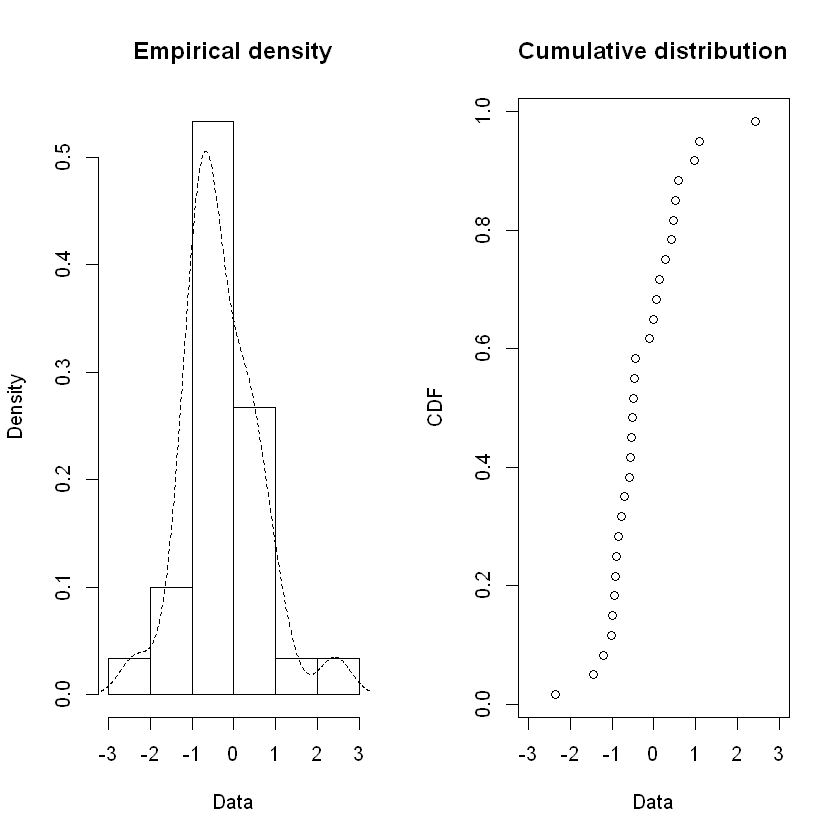

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

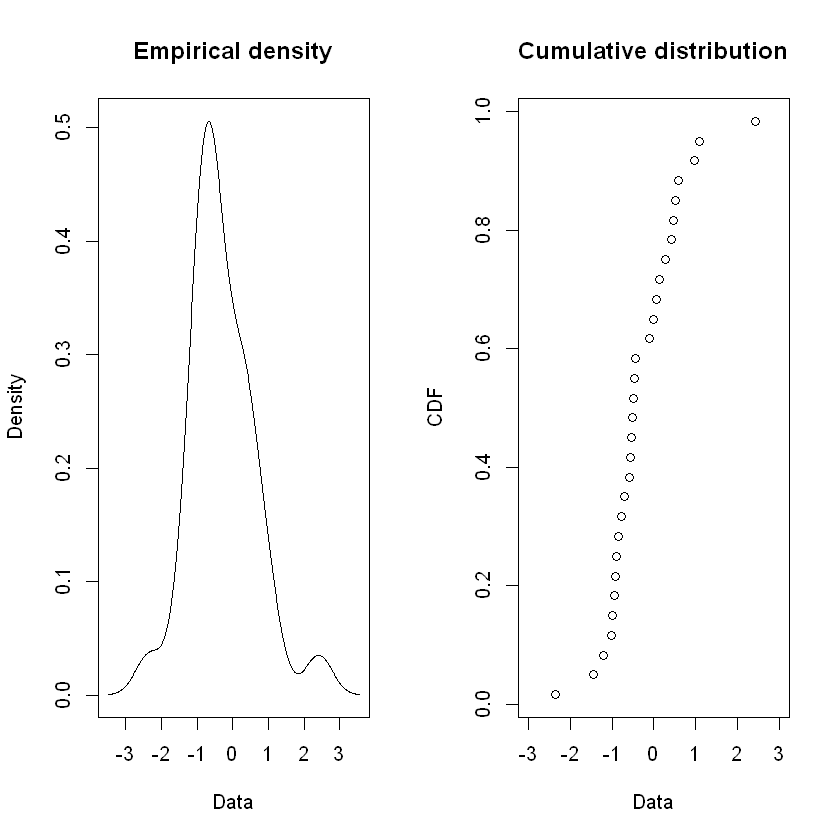

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

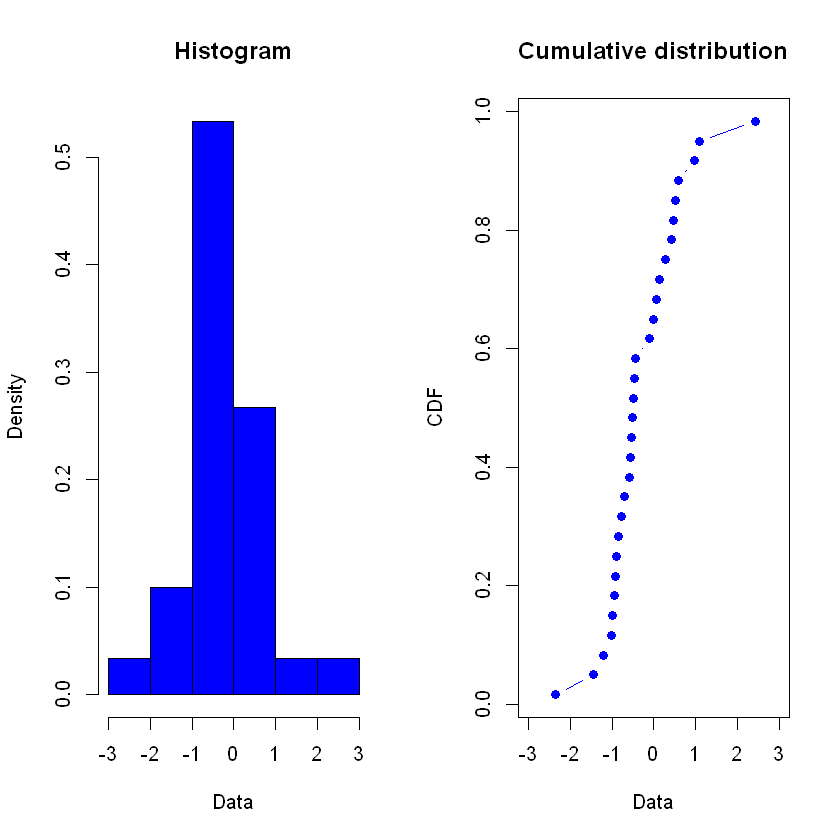

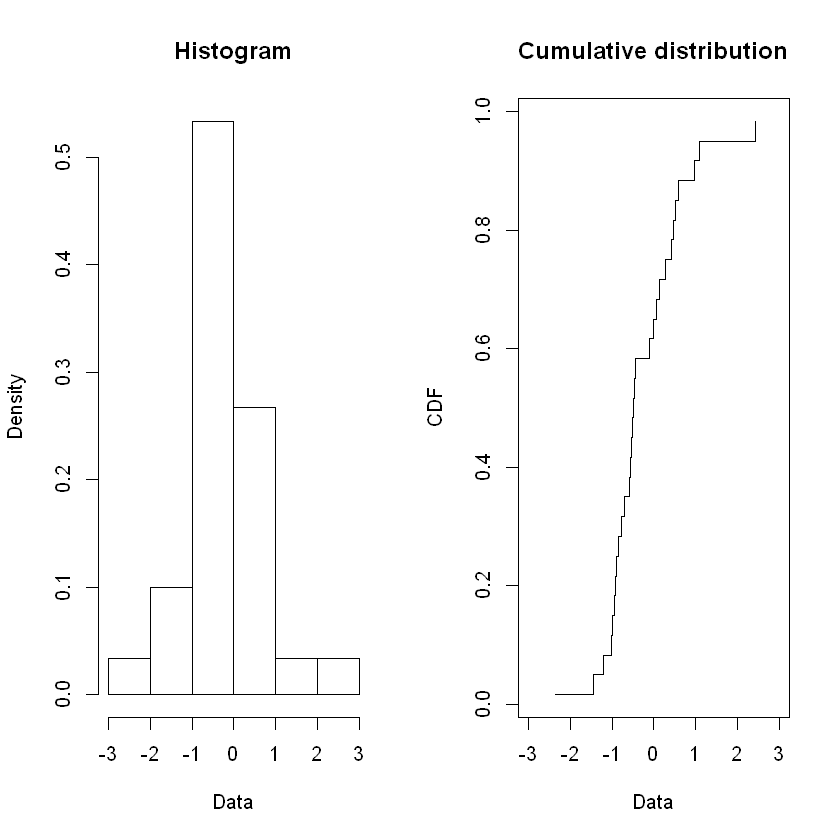

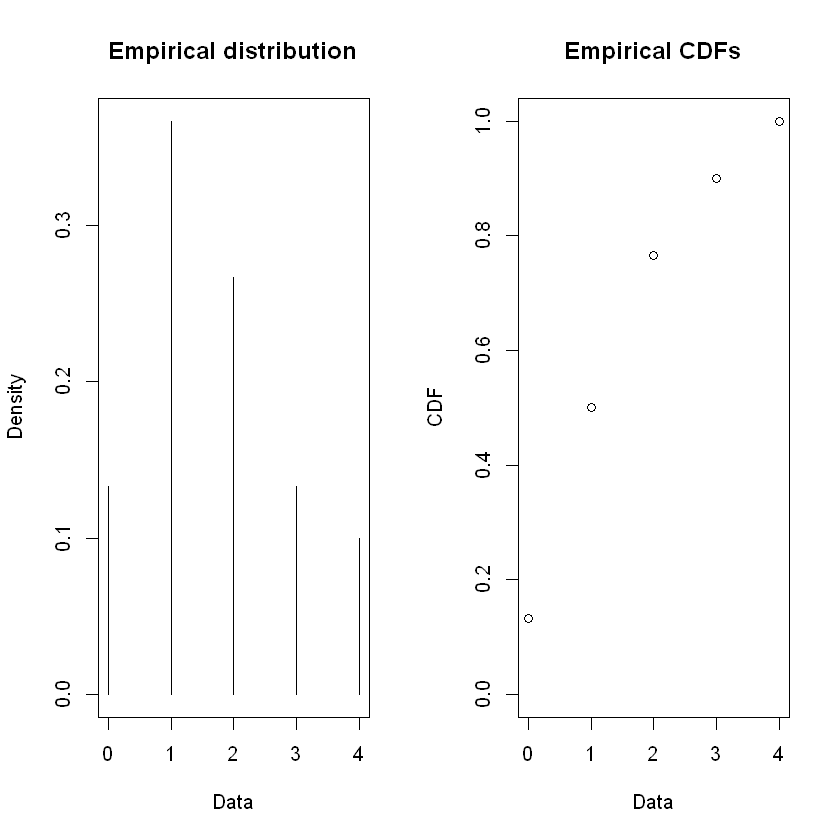

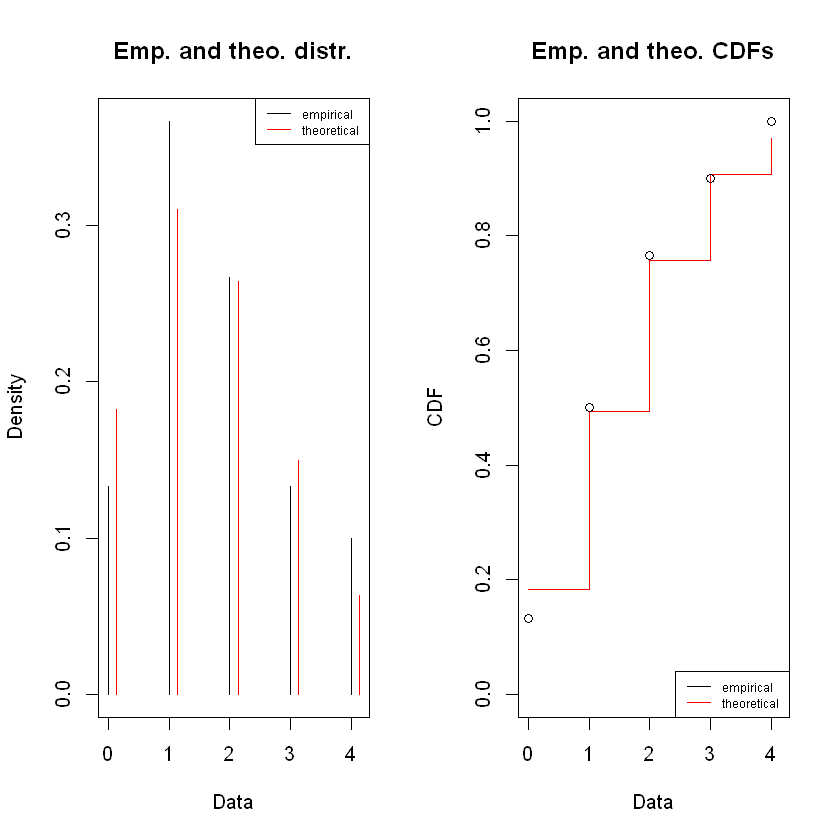

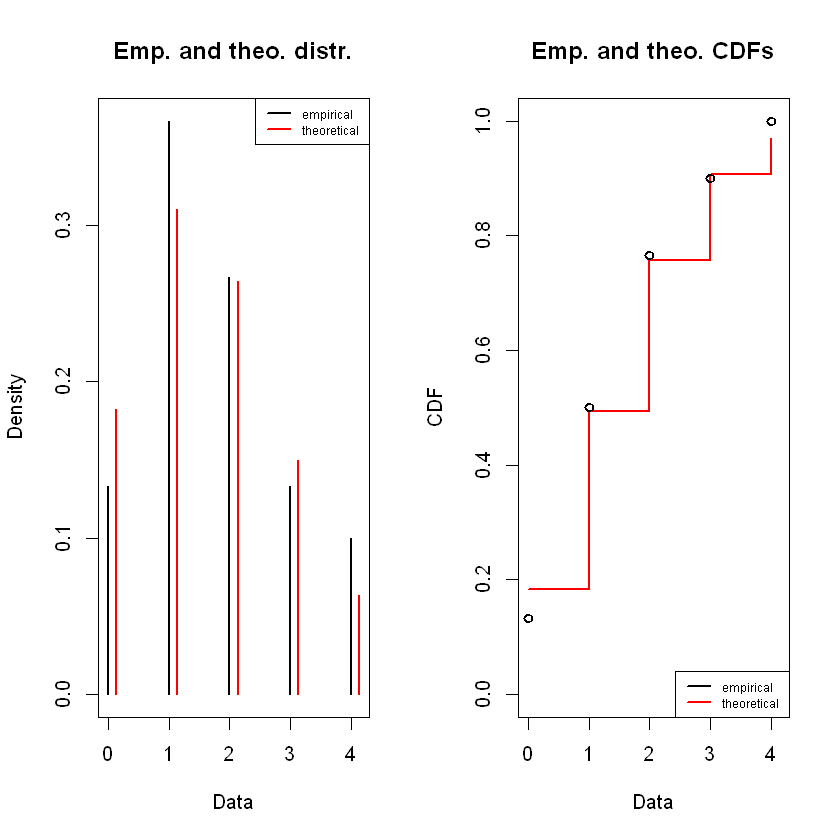

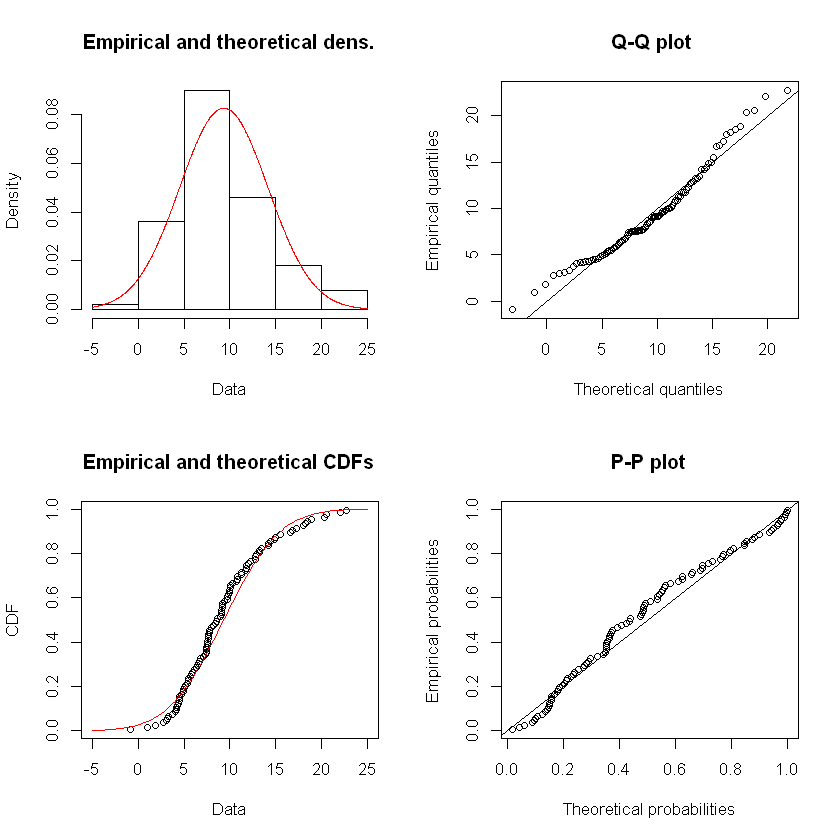

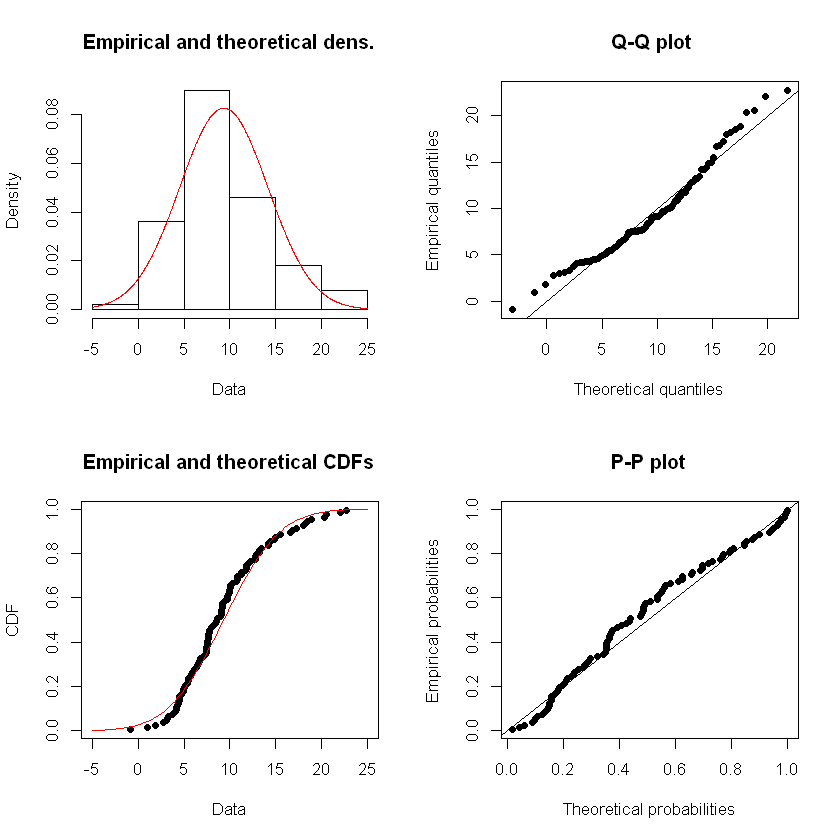

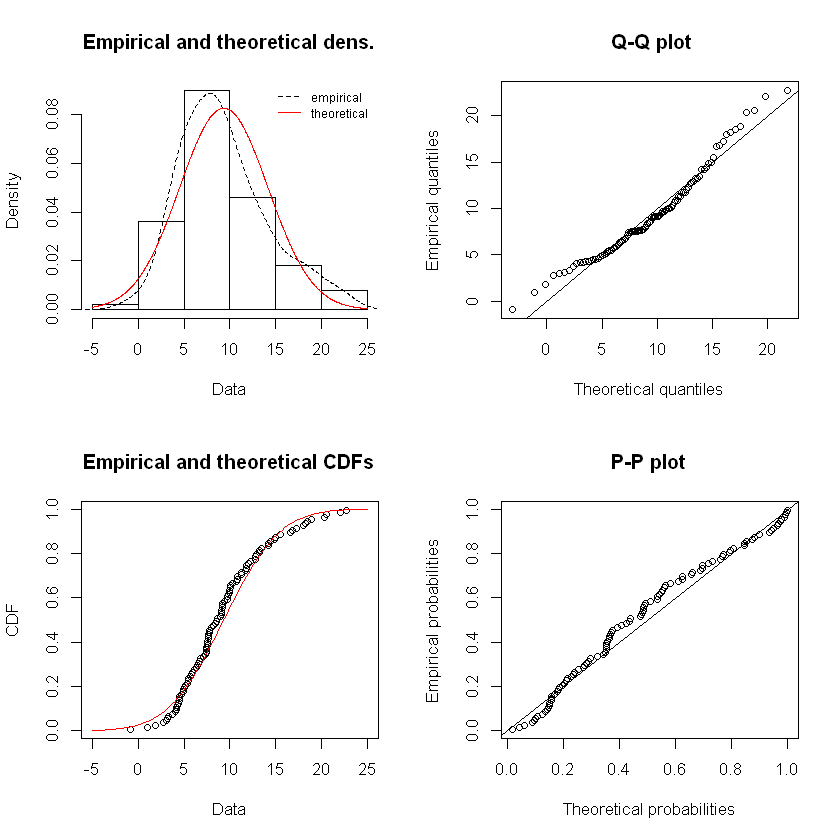

Warning message in plot.window(xlim, ylim, "", ...):
"graphical parameter "type" is obsolete"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
"graphical parameter "type" is obsolete"Warning message in axis(1, ...):
"graphical parameter "type" is obsolete"Warning message in axis(2, ...):
"graphical parameter "type" is obsolete"

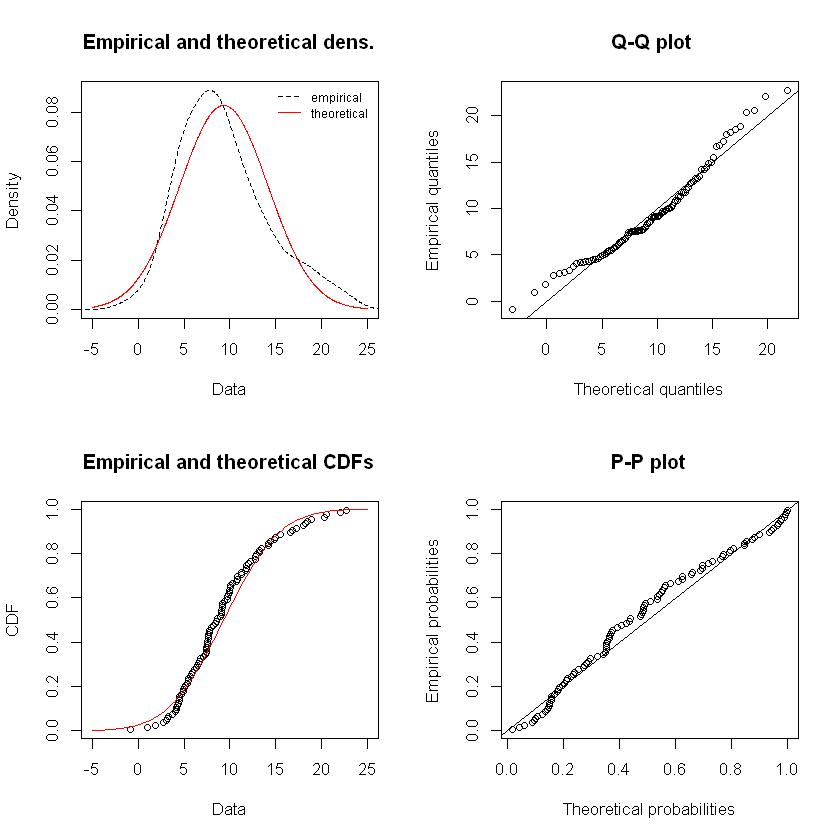

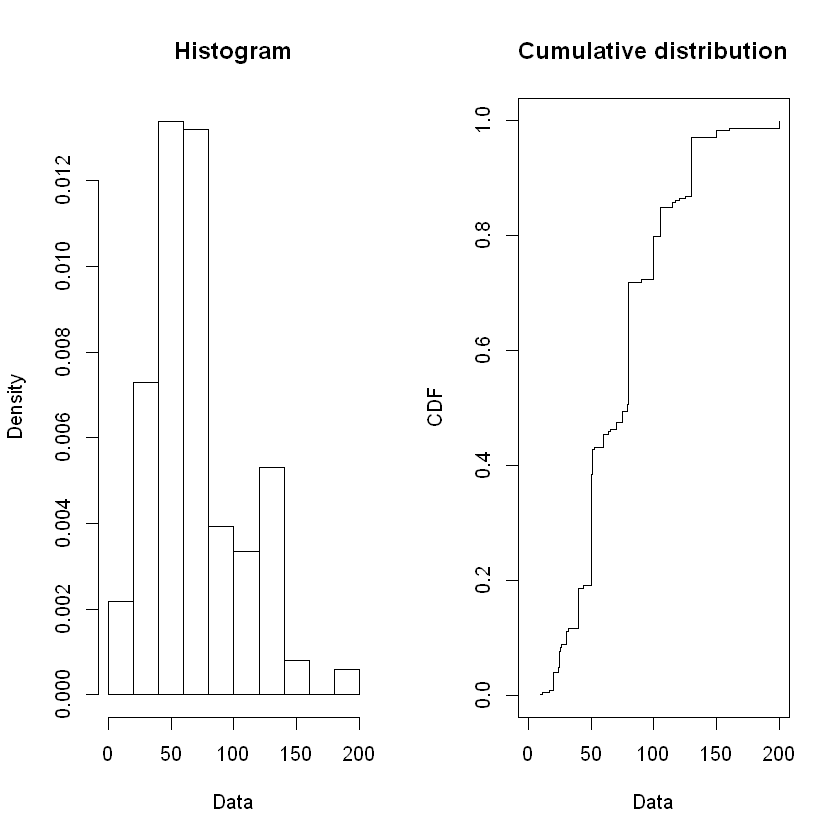

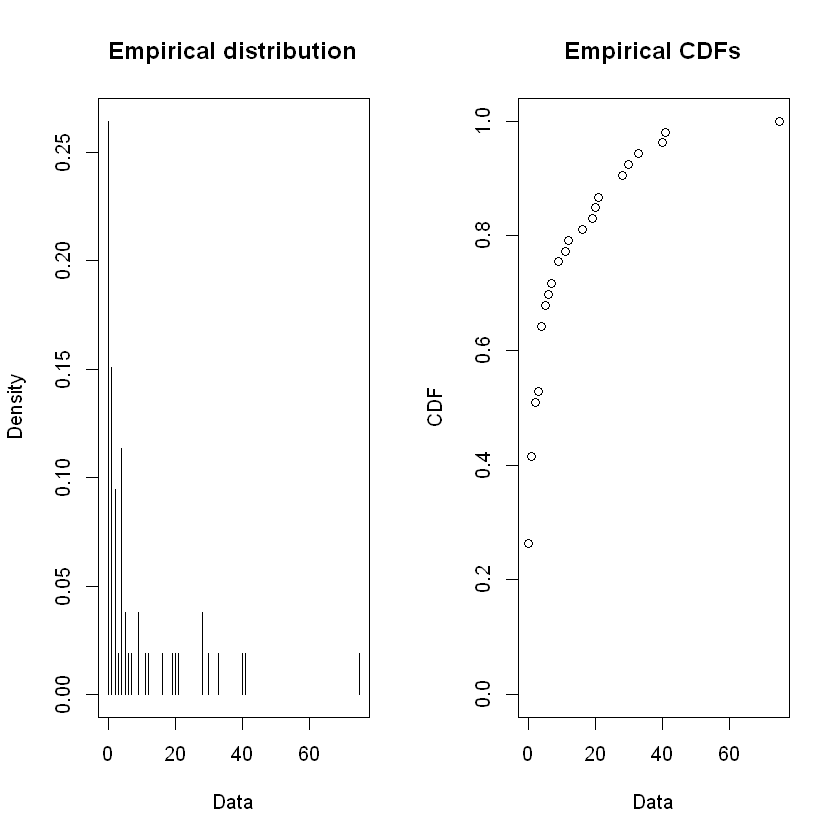

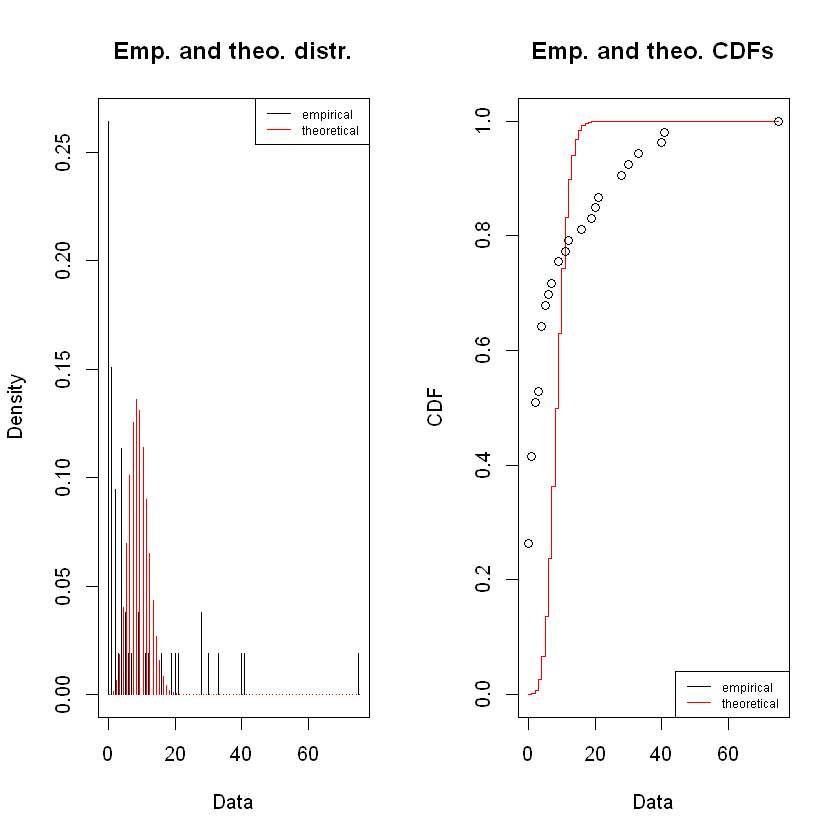

In [76]:
library(fitdistrplus)
# NOT RUN {
# (1) Plot of an empirical distribution with changing 
# of default line types for CDF and colors
# and optionally adding a density line
#
set.seed(1234)
x1 <- rnorm(n=30)
plotdist(x1)
plotdist(x1,demp = TRUE)
plotdist(x1,histo = FALSE, demp = TRUE)
plotdist(x1, col="blue", type="b", pch=16)
plotdist(x1, type="s")

# (2) Plot of a discrete distribution against data
#
set.seed(1234)
x2 <- rpois(n=30, lambda = 2)
plotdist(x2, discrete=TRUE)
plotdist(x2, "pois", para=list(lambda = mean(x2)))
plotdist(x2, "pois", para=list(lambda = mean(x2)), lwd="2")

# (3) Plot of a continuous distribution against data
#
xn <- rnorm(n=100, mean=10, sd=5)
plotdist(xn, "norm", para=list(mean=mean(xn), sd=sd(xn)))
plotdist(xn, "norm", para=list(mean=mean(xn), sd=sd(xn)), pch=16)
plotdist(xn, "norm", para=list(mean=mean(xn), sd=sd(xn)), demp = TRUE)
plotdist(xn, "norm", para=list(mean=mean(xn), sd=sd(xn)), 
histo = FALSE, demp = TRUE)

# (4) Plot of serving size data
#
data(groundbeef)
plotdist(groundbeef$serving, type="s")

# (5) Plot of numbers of parasites with a Poisson distribution 
data(toxocara)
number <- toxocara$number
plotdist(number, discrete = TRUE)
plotdist(number,"pois",para=list(lambda=mean(number)))